# Debuging

In [1]:
OrderedSet = ["apple", "orange", "melon", "kiwi", "strawberry"]
print([OrderedSet[x] for x in [1, 3, 4]]) 

['orange', 'kiwi', 'strawberry']


In [33]:
"""A numpy array of bounding box coordinates with shape [n,5] in format:

[[x11, y11, x12, y12, classid1],
 [x21, y21, x22, y22, classid2],
 ...
 [xn1, yn1, xn2, yn2, classid3]]"""

import numpy as np
coords = np.array([[10, 5, 15, 6, 0],
                   [11, 3, 13, 6, 0],
                   [5, 3, 13, 6, 1],
                   [4, 4, 13, 6, 1],
                   [6, 5, 13, 16, 1]])

coords[:,[1,0,3,2,4]]

array([[ 5, 10,  6, 15,  0],
       [ 3, 11,  6, 13,  0],
       [ 3,  5,  6, 13,  1],
       [ 4,  4,  6, 13,  1],
       [ 5,  6, 16, 13,  1]])

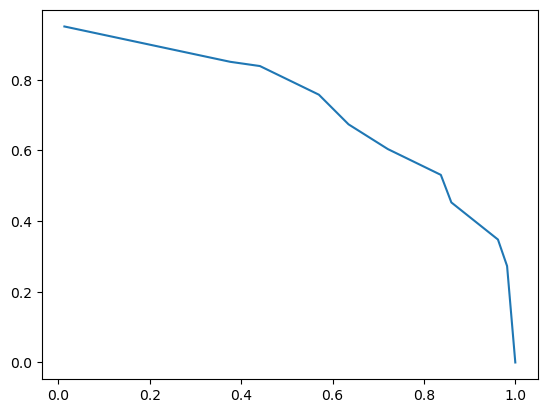

In [2]:
import csv
import matplotlib.pyplot as plt
import pandas as pd

f = open("data_file.csv", "w")
w = csv.writer(f)
_ = w.writerow(["precision", "recall"])
w.writerows([[0.013,0.951],
             [0.376,0.851],
             [0.441,0.839],
             [0.570,0.758],
             [0.635,0.674],
             [0.721,0.604],
             [0.837,0.531],
             [0.860,0.453],
             [0.962,0.348],
             [0.982,0.273],
             [1.0,0.0]])
f.close()

Dataframe = pd.read_csv('data_file.csv')
"""Cannot pass a CSV file directly into the plt.show() function as an argument
Use Pandas package to create a dataframe out of the CSV file and plot the values"""

plt.plot(Dataframe.precision, Dataframe.recall) 
plt.show()

# Bayesian Network (Example)

In [16]:
conda install -c ankurankan pgmpy

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install opt-einsum

     ---------------------------------------- 65.5/65.5 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [17]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

# Define the model structure
model = BayesianModel([('Talent', 'Test'), ('Practice', 'Test'), ('Test', 'Offer')])

C:\Users\z4224\anaconda3\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [18]:
# Define individual CPDs
cpd_Talent = TabularCPD(variable='Talent', variable_card=2, values=[[0.6],[0.4]])
cpd_Practice = TabularCPD(variable='Practice', variable_card=2, values=[[0.7],[0.3]])

In [19]:
cpd_Test = TabularCPD(variable = 'Test', variable_card = 3,
 values = [[0.5, 0.8, 0.8, 0.9],
 [0.3, 0.15, 0.1, 0.08],
 [0.2, 0.05, 0.1, 0.02]],
 evidence = ['Practice', 'Talent'],
 evidence_card = [2,2])
cpd_Offer = TabularCPD(variable = 'Offer', variable_card = 2,
 values = [[0.95, 0.8, 0.5],
 [0.05, 0.2, 0.5]],
 evidence = ['Test'],
 evidence_card = [3])

In [20]:
# Associate the CPDs with the network
model.add_cpds(cpd_Talent, cpd_Practice, cpd_Test, cpd_Offer)
model.check_model()

True

In [21]:
model.get_cpds()

[<TabularCPD representing P(Talent:2) at 0x254b25bf340>,
 <TabularCPD representing P(Practice:2) at 0x254b03b1d60>,
 <TabularCPD representing P(Test:3 | Practice:2, Talent:2) at 0x254b25bfb80>,
 <TabularCPD representing P(Offer:2 | Test:3) at 0x254b25bf400>]

In [24]:
# Printing a CPD 
print(model.get_cpds('Talent'))
model.get_cardinality('Talent')

+-----------+-----+
| Talent(0) | 0.6 |
+-----------+-----+
| Talent(1) | 0.4 |
+-----------+-----+


2

In [30]:
# Printing a CPD 
print(model.get_cpds('Practice'))
model.get_cardinality('Practice')

+-------------+-----+
| Practice(0) | 0.7 |
+-------------+-----+
| Practice(1) | 0.3 |
+-------------+-----+


2

In [26]:
# Printing a CPD 
print(model.get_cpds('Test'))
model.get_cardinality('Test')

+----------+-------------+-------------+-------------+-------------+
| Practice | Practice(0) | Practice(0) | Practice(1) | Practice(1) |
+----------+-------------+-------------+-------------+-------------+
| Talent   | Talent(0)   | Talent(1)   | Talent(0)   | Talent(1)   |
+----------+-------------+-------------+-------------+-------------+
| Test(0)  | 0.5         | 0.8         | 0.8         | 0.9         |
+----------+-------------+-------------+-------------+-------------+
| Test(1)  | 0.3         | 0.15        | 0.1         | 0.08        |
+----------+-------------+-------------+-------------+-------------+
| Test(2)  | 0.2         | 0.05        | 0.1         | 0.02        |
+----------+-------------+-------------+-------------+-------------+


3

In [27]:
# Printing a CPD 
print(model.get_cpds('Offer'))
model.get_cardinality('Offer')


+----------+---------+---------+---------+
| Test     | Test(0) | Test(1) | Test(2) |
+----------+---------+---------+---------+
| Offer(0) | 0.95    | 0.8     | 0.5     |
+----------+---------+---------+---------+
| Offer(1) | 0.05    | 0.2     | 0.5     |
+----------+---------+---------+---------+


2